## Importing cleaned Data wrangled from the internet

- Scheduled flights for Frankfurt Airport (assumed flights for 2019)
- Tracked flights for Frankfurt Airport (actual flights for 2020)
- Pollution data from Wiesbaden Weather Station (near Frankfurt)
- Bitcoin value vs the EUR, USD and CNY
- Zoom share prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# importing scheduled flight data for 2019

df_flights_2019 = pd.read_json('../data/clean_frankfurt_flight_2019.json')
#df_flights_2019.set_index('date', inplace=True)

df_flights_2019.head()


,date,scheduled_flights
0,2019-05-18,127
1,2019-05-19,116
2,2019-05-20,128
3,2019-05-21,135
4,2019-05-22,140


In [3]:
# importing scheduled flight data for 2020

df_flights_2020 = pd.read_json('../data/clean_frankfurt_flight_2020.json')

df_flights_2020.head()


,date,tracked_flights
0,2020-05-18,87
1,2020-05-19,73
2,2020-05-20,86
3,2020-05-21,85
4,2020-05-22,95


In [4]:
# Importing pollution data from 16-06-2019 to 16-06-2020 
# Using lower() on 'Date'

df_pollution = pd.read_json('../data/clean_pollutiondata_incl_may19.json')
df_pollution.columns = ['date', 'o3', 'pm25', 'pm10', 'no2']

df_pollution.head(10)

,date,o3,pm25,pm10,no2
0,2019-05-18,28.5,27,9,13.0
1,2019-05-19,24.9,32,10,10.0
2,2019-05-20,24.0,67,25,8.8
3,2019-05-21,23.8,22,7,8.9
4,2019-05-22,27.5,50,14,7.1
5,2019-05-23,17.6,55,18,15.0
6,2019-05-24,26.5,49,16,19.7
7,2019-05-25,36.7,35,12,7.6
8,2019-05-26,31.1,34,11,9.7
9,2019-05-27,15.6,23,8,10.2


In [5]:
# Importing bitcoin normalised data from 16-06-2019 to 16-06-2020

df_bitcoin = pd.read_json('../data/clean_bitcoin_exchange_normalised.json')
df_bitcoin = df_bitcoin.reset_index()
df_bitcoin.columns = ['date', 'eur', 'cny_eur_val', 'usd_eur_val']

df_bitcoin.head()


,date,eur,cny_eur_val,usd_eur_val
0,2019-06-16,7853.059952,7850.528097,7849.928349
1,2019-06-17,8006.856370,7993.332848,7992.498298
2,2019-06-18,8298.389613,8323.963456,8324.723603
3,2019-06-19,8121.834445,8113.257039,8114.590654
4,2019-06-20,8264.077225,8271.571985,8212.548575


In [6]:
# Importing zoom boom share prices from 16-06-2019 to 16-06-2020
# Extracting relevant columns for merging

df_zoom_shares = pd.read_json('../data/zoom_shareprice.json')

df_zoom_shares_close = df_zoom_shares[['date','close']]

df_zoom_shares_close.head()

,date,close
0,2020-06-15,239.02
1,2020-06-12,219.52
2,2020-06-11,222.07
3,2020-06-10,221.02
4,2020-06-09,205.43


In [7]:
df_zoom_shares_volatility = df_zoom_shares[['date','close','high_low']]
df_zoom_shares_volatility.head()

,date,close,high_low
0,2020-06-15,239.02,13.21
1,2020-06-12,219.52,14.70
2,2020-06-11,222.07,13.50
3,2020-06-10,221.02,13.27
4,2020-06-09,205.43,7.66


## Merging relevant columns from datasets

- merging df_flights_2019 with df_pollution
- merging df_flights_2020 with df_pollution
- merging df_bitcoin and df_zoom_shares_close
- plotting df_zoom_shares_close and df_zoom_shares_volatility
- merging df_zoom_shares_close and df_pollution

### Flights and pollution

In [8]:
# merging df_flights_2019 with df_pollution

df_pol_flights_2019 = df_flights_2019.merge(df_pollution)

df_pol_flights_2019.head()


,date,scheduled_flights,o3,pm25,pm10,no2
0,2019-05-18,127,28.5,27,9,13.0
1,2019-05-19,116,24.9,32,10,10.0
2,2019-05-20,128,24.0,67,25,8.8
3,2019-05-21,135,23.8,22,7,8.9
4,2019-05-22,140,27.5,50,14,7.1


In [9]:
# merging df_flights_2020 with df_pollution

df_pol_flights_2020 = df_flights_2020.merge(df_pollution)

df_pol_flights_2020.head()


,date,tracked_flights,o3,pm25,pm10,no2
0,2020-05-18,87,32.9,23,11,15.3
1,2020-05-19,73,39.4,29,13,13.9
2,2020-05-20,86,31.6,44,16,12.8
3,2020-05-21,85,27.8,30,11,6.6
4,2020-05-22,95,30.3,46,18,12.5


In [10]:
# merging df_bitcoin and df_zoom_shares_close

compare_bitcoin_zoom = df_bitcoin.merge(df_zoom_shares_close)
compare_bitcoin_zoom.head()

,date,eur,cny_eur_val,usd_eur_val,close
0,2019-06-17,8006.856370,7993.332848,7992.498298,98.11
1,2019-06-18,8298.389613,8323.963456,8324.723603,99.64
2,2019-06-19,8121.834445,8113.257039,8114.590654,102.39
3,2019-06-20,8264.077225,8271.571985,8212.548575,102.30
4,2019-06-21,8453.609849,8410.131706,8437.888446,100.47


In [11]:
# plotting df_zoom_shares_close and df_zoom_shares_volatility

df_zoom_shares_volatility.head()

,date,close,high_low
0,2020-06-15,239.02,13.21
1,2020-06-12,219.52,14.70
2,2020-06-11,222.07,13.50
3,2020-06-10,221.02,13.27
4,2020-06-09,205.43,7.66


In [12]:
# merging df_zoom_shares_close and df_pollution

compare_zoom_pollution = df_zoom_shares_close.merge(df_pollution)

compare_zoom_pollution.head()

,date,close,o3,pm25,pm10,no2
0,2020-06-15,239.02,26.0,30,10,10.5
1,2020-06-12,219.52,26.1,35,12,7.7
2,2020-06-11,222.07,24.5,29,9,6.5
3,2020-06-10,221.02,27.0,31,10,8.4
4,2020-06-09,205.43,25.9,28,10,10.4


## Time to plot

- df_pol_flights_2019 
- df_pol_flights_2020
- compare_bitcoin_zoom
- df_zoom_shares_volatility
- compare_zoom_pollution

In [13]:
# first set all 'date' columns to index

dfs = [df_pol_flights_2019, 
       df_pol_flights_2020,
       df_pollution,
       compare_bitcoin_zoom, 
       df_zoom_shares_volatility,
       compare_zoom_pollution]

for df in dfs:
    df = df.set_index('date', inplace=True)


(0, 250)

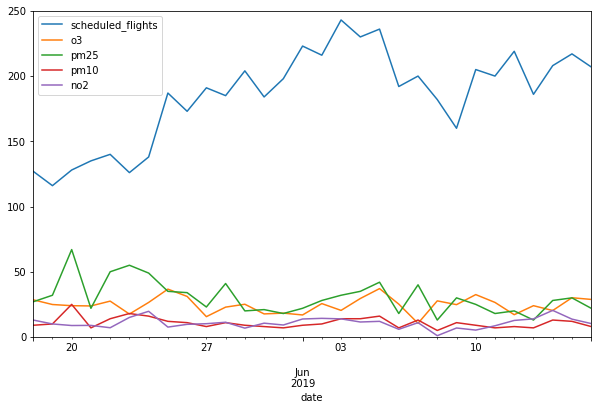

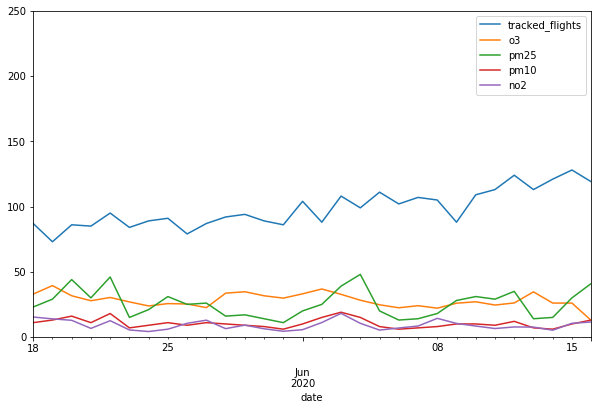

In [28]:
# plotting df_pol_flights_2019

df_pol_flights_2019.plot(figsize=(10,6))
plt.ylim(0, 250)
df_pol_flights_2020.plot(figsize=(10,6))
plt.ylim(0, 250)

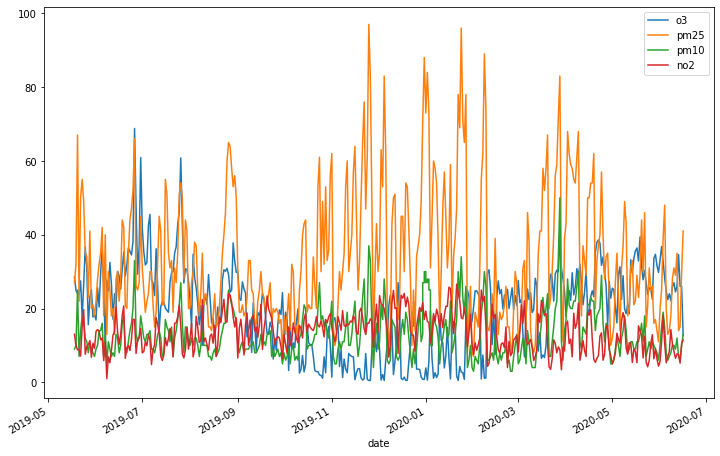

In [22]:
df_pollution.plot(figsize=(12,8))

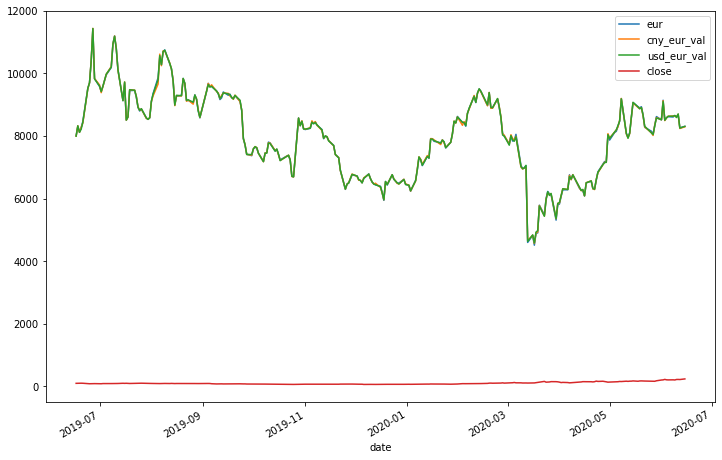

In [29]:
compare_bitcoin_zoom.plot(figsize=(12,8))

In [ ]:
#fig, ax = 

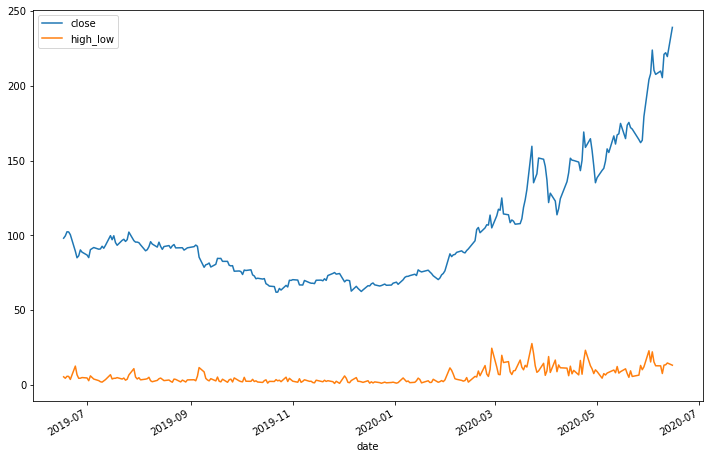

In [30]:
df_zoom_shares_volatility.plot(figsize=(12,8))

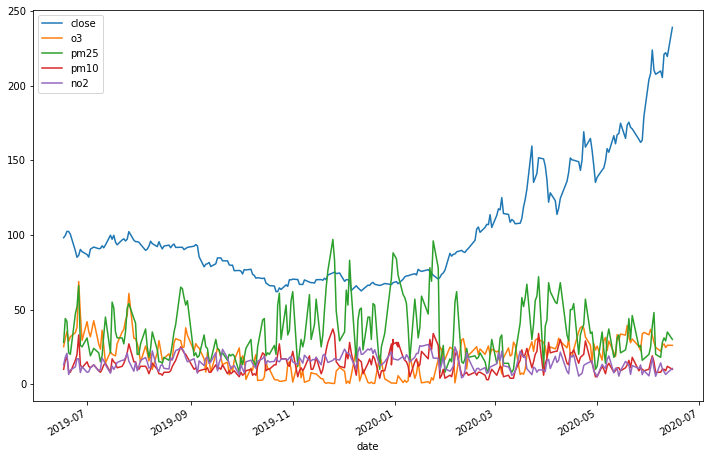

In [31]:
compare_zoom_pollution.plot(figsize=(12,8))